# Import Libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score, RocCurveDisplay


# Load dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\HP\Downloads\New folder\9th, 10th - logistic, pca\2.LOGISTIC REGRESSION CODE\logit classification.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#  Split features and target

In [4]:
X = dataset.iloc[:, [2, 3]].values   # (Age, Estimated Salary)
y = dataset.iloc[:, -1].values       # Target column


#  Split data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#  Feature Scaling

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Train Logistic Regression Model

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Make Prediction

In [10]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # for ROC curve


# confusion matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[57  1]
 [ 5 17]]


# Predicting Model Accuracy

In [12]:
ac=accuracy_score(y_test,y_pred)
print(ac)

0.925


In [13]:
Bias=classifier.score(X_train,y_train)
Bias

0.821875

In [14]:
Variance=classifier.score(X_test,y_test)
Variance

0.925

# Classification report


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

Model Accuracy: 0.925


# visualizing the Training set result

C:\Users\HP\AppData\Local\Temp\ipykernel_13772\4167996948.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


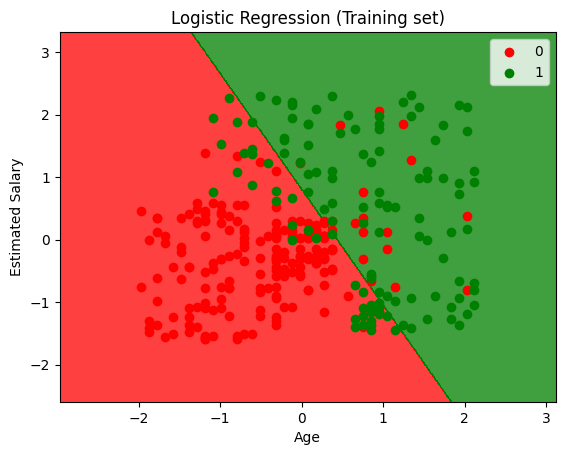

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# use the correctly cased variables X1/X2 and X_set (not x1/x2/x_set)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# Plot Confusion Matrix

Text(0, 0.5, 'True Label')

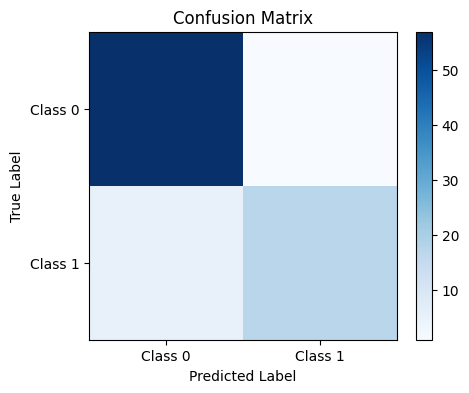

In [17]:
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Auc Roc Curve

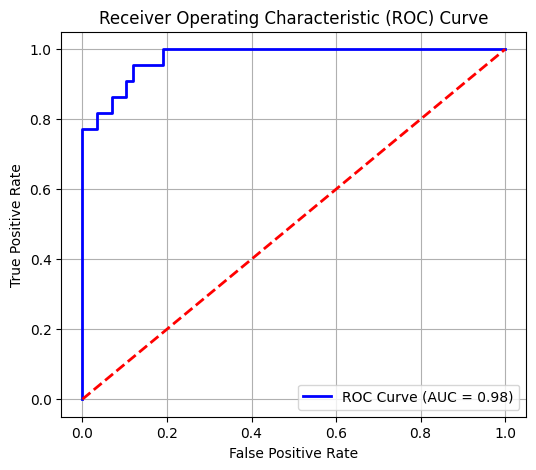

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()